In [5]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from matplotlib.patches import Rectangle
data = pd.read_csv("data/netflix_results.csv") 

In [6]:
# Preview the first 5 lines of the loaded data 
data.head()

,frame.number,frame.time_relative,frame.len,wlan_radio.phy,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.data_rate,wlan_radio.duration,wlan.fc.type_subtype,wlan.fc.type,wlan.fc.subtype,wlan.duration,wlan.fc.ds,wlan.fc.retry,wlan.fcs.status,wlan.qos.priority,data.len
0,1,0.000000,68,6,2412,-25.0,24.0,32,25,1,9,0,0x00000000,0,1,NaN,NaN
1,2,0.001863,56,6,2412,-26.0,24.0,28,27,1,11,158,0x00000000,0,1,NaN,NaN
2,3,0.001871,50,6,2412,-40.0,24.0,28,28,1,12,114,0x00000000,0,1,NaN,NaN
3,4,0.001874,68,6,2412,-41.0,24.0,32,25,1,9,0,0x00000000,0,1,NaN,NaN
4,5,0.004888,56,6,2412,-40.0,24.0,28,27,1,11,1724,0x00000000,0,1,NaN,NaN


In [7]:
#Number of Packets in captured Session
data['frame.number'].count()

222070

In [8]:
print('The largest frame that was captured: ', data['frame.len'].max(), ' bytes')
print('The smallest frame that was captured: ', data['frame.len'].min(), ' bytes')
print('The lowest radio signal strength: ', data['wlan_radio.signal_dbm'].max(),' dBm')
print('The highest radio signal strength: ', data['wlan_radio.signal_dbm'].min(),' dBm')

The largest frame that was captured:  1593  bytes
The smallest frame that was captured:  50  bytes
The lowest radio signal strength:  -19.0  dBm
The highest radio signal strength:  -97.0  dBm


In [9]:
# How many Packets are there for each Frame Type?
data['wlan.fc.type'].value_counts()

1    150842
0     41259
2     29969
Name: wlan.fc.type, dtype: int64

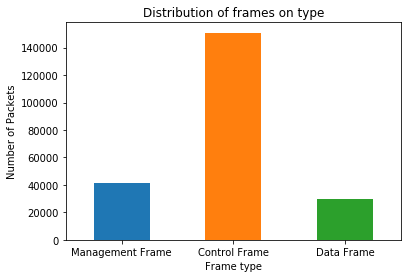

In [10]:

#Plot the distribution:
ftypes = ['Management Frame','Control Frame','Data Frame']
pos = np.arange(len(ftypes))
data.groupby('wlan.fc.type')['frame.number'].nunique().plot(kind='bar')
plt.title("Distribution of frames on type")
plt.xlabel("Frame type")
plt.ylabel("Number of Packets")
plt.xticks(pos,ftypes,rotation=0)
plt.show()


In [11]:
# How many Packets are there for each SubFrame Type?
data.groupby('wlan.fc.type')['wlan.fc.subtype'].value_counts()

wlan.fc.type  wlan.fc.subtype
0             8                  36847
              5                   3969
              4                    313
              13                   129
              12                     1
1             9                  48416
              11                 47173
              12                 38506
              13                 13089
              8                   3306
              14                   352
2             4                  20709
              8                   5749
              12                  1821
              0                   1690
Name: wlan.fc.subtype, dtype: int64

In [12]:
data.groupby(['wlan.fc.type','wlan.fc.subtype'])['frame.number'].nunique()

wlan.fc.type  wlan.fc.subtype
0             4                    313
              5                   3969
              8                  36847
              12                     1
              13                   129
1             8                   3306
              9                  48416
              11                 47173
              12                 38506
              13                 13089
              14                   352
2             0                   1690
              4                  20709
              8                   5749
              12                  1821
Name: frame.number, dtype: int64

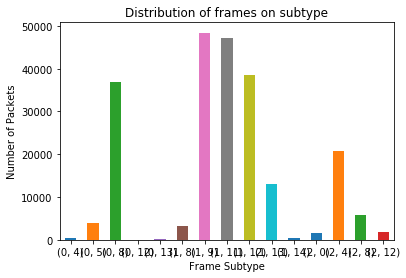

In [13]:

#Plot the distribution:
ftypes = ['Association Request','Probe Request','Probe Response','Beacon',
            'Annoucement Traffic Indication Map','Authentication','DeAuthentication','Action Frames','Control Frame End']
pos = np.arange(len(ftypes))
data.groupby(['wlan.fc.type','wlan.fc.subtype'])['frame.number'].nunique().plot(kind='bar')
#data.groupby('wlan.fc.subtype')['frame.number'].nunique().plot(kind='bar')
plt.title("Distribution of frames on subtype")
plt.xlabel("Frame Subtype")
plt.ylabel("Number of Packets")
#plt.xticks(pos,ftypes,rotation=0)
plt.xticks(rotation=0)

plt.show()


In [14]:
#Which direction does the data flow (number of Packets)?
data['wlan.fc.ds'].value_counts()

0x00000000    192101
0x00000001     22622
0x00000002      7347
Name: wlan.fc.ds, dtype: int64

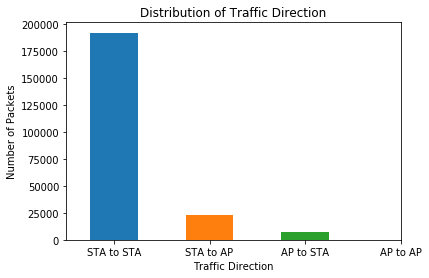

In [15]:
#Plot the distribution:
ftypes = ['STA to STA','STA to AP','AP to STA','AP to AP']
pos = np.arange(len(ftypes))
data.groupby('wlan.fc.ds')['frame.number'].nunique().plot(kind='bar')
plt.title("Distribution of Traffic Direction")
plt.xlabel("Traffic Direction")
plt.ylabel("Number of Packets")
plt.xticks(pos,ftypes,rotation=0)
plt.show()

In [16]:
#What QoS does the data flows have?
data['wlan.qos.priority'].value_counts()

0.0    6492
6.0    1067
4.0       6
5.0       3
2.0       2
Name: wlan.qos.priority, dtype: int64

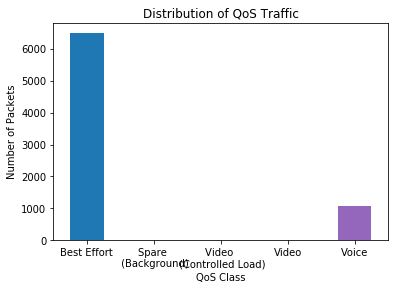

In [17]:

#Plot the distribution:
ftypes = ['Best Effort','Spare \n (Background)','Video \n (Controlled Load)','Video','Voice']
pos = np.arange(len(ftypes))
data.groupby('wlan.qos.priority')['frame.number'].nunique().plot(kind='bar')
plt.title("Distribution of QoS Traffic")
plt.xlabel("QoS Class")
plt.ylabel("Number of Packets")
plt.xticks(pos,ftypes,rotation=0)
plt.show()

In [18]:
#Max data transferred in a packet(bytes)
data['data.len'].max()

1516.0

In [19]:
#Min data transferred in a packet(bytes)
data['data.len'].min()

44.0

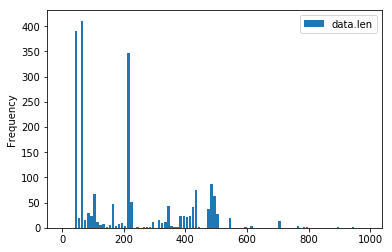

In [20]:
#Plot the distribution of data length (bytes):
bin1 = [i for i in range(0,1000,10)]
data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()

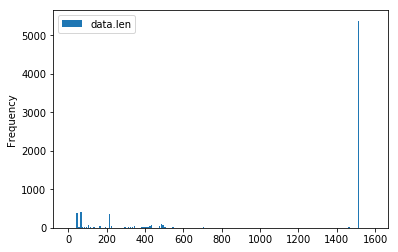

In [21]:
#Plot the distribution of data length (bytes):
bin1 = [i for i in range(0,1600,10)]
data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()

In [22]:
data['data.len'].value_counts()

1516.0    5379
62.0       322
217.0      292
48.0       276
44.0       114
68.0        80
431.0       59
218.0       49
486.0       45
341.0       44
109.0       38
164.0       31
488.0       28
228.0       26
422.0       24
470.0       22
380.0       22
494.0       21
223.0       20
548.0       19
490.0       19
105.0       17
88.0        17
1466.0      16
433.0       15
502.0       15
472.0       14
52.0        14
424.0       14
484.0       14
          ... 
325.0        1
175.0        1
333.0        1
282.0        1
67.0         1
192.0        1
201.0        1
388.0        1
173.0        1
473.0        1
312.0        1
157.0        1
592.0        1
156.0        1
363.0        1
1177.0       1
590.0        1
73.0         1
276.0        1
427.0        1
176.0        1
1201.0       1
429.0        1
124.0        1
186.0        1
432.0        1
1415.0       1
214.0        1
706.0        1
191.0        1
Name: data.len, Length: 146, dtype: int64

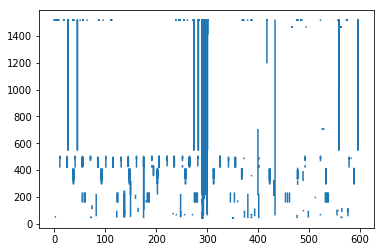

In [23]:
#Packet Size over Time
plt.plot(data['frame.time_relative'], data['data.len'])

#bin1 = [i for i in range(0,1600,100)]
#data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()

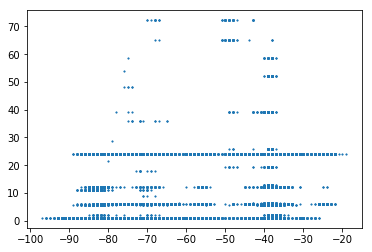

In [ ]:
#Packet Size over Time
plt.scatter(data['wlan_radio.signal_dbm'], data['wlan_radio.data_rate'],marker='X',s=1**2)

#bin1 = [i for i in range(0,1600,100)]
#data[['data.len']].plot(kind='hist',bins=bin1,rwidth=0.8)
plt.show()

In [ ]:
data[['wlan_radio.signal_dbm']].plot(kind='bar')
plt.show()